### Student Information
Name: 劉其生

Student ID: 109006240

GitHub ID: GukGuk25

Kaggle name: jrglqs

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

## First

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


### Exercise 1

2075    It's funny that everyone came in my life as th...
2814    @MaxVenator We've had no foreign policy but ha...
1215                                 I'm such a shy girl🙄
3110    Eating an egg is grim, you are eating the mate...
1292    @YahooCare data stolen in 2014 and only now do...
                              ...                        
404     Do not despise the Lord ’s #discipline, do not...
1689    #picoftheday : How...why... Really... !!\n    ...
1726       Getting terrible download speeds for fifa smh.
1176    However the agent was inauthentic, my sister s...
2865    come to the funeral tomorrow at 12 to mourn th...
Name: text, Length: 3613, dtype: object


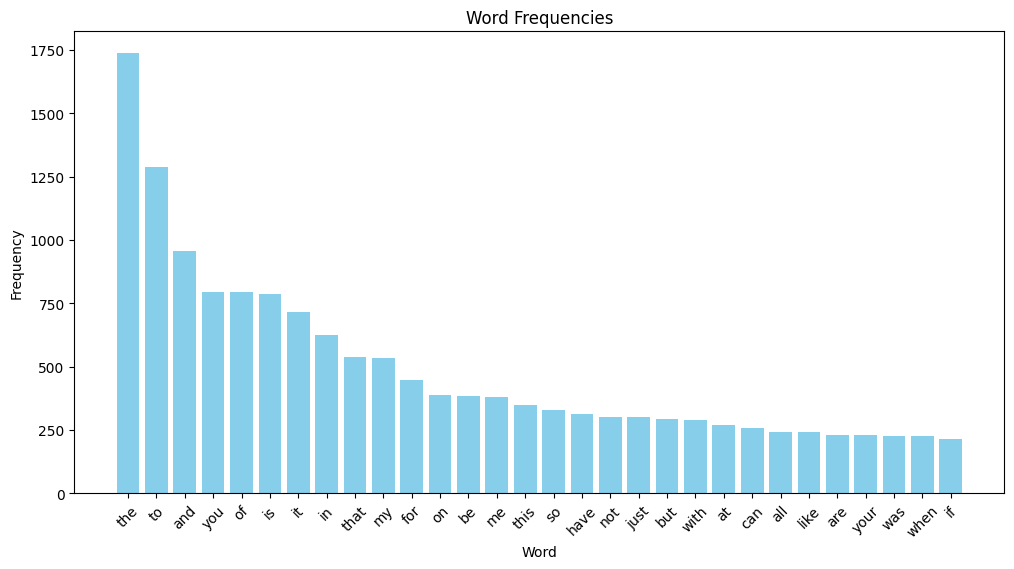

128    They'll be yo friend, shake your hand, then ki...
296    @DxfyingGrxvity - frustration, looking up at E...
66     Taking umbrage because Jimmy Carr claimed that...
183    @AaliyahLove69 I would be intimidated but I wo...
153    When you're scared to press send #bgoodthepoet...
                             ...                        
131    also i had an awful nightmare involving being ...
311    On bedrest since I got out of the hospital. U ...
207    @Geminiak @LondonNPC you're welcome! #wordgeek...
101    @All4 is the android app it designed to be bug...
92     If my concerns &amp; anxiety don't matter to y...
Name: text, Length: 347, dtype: object


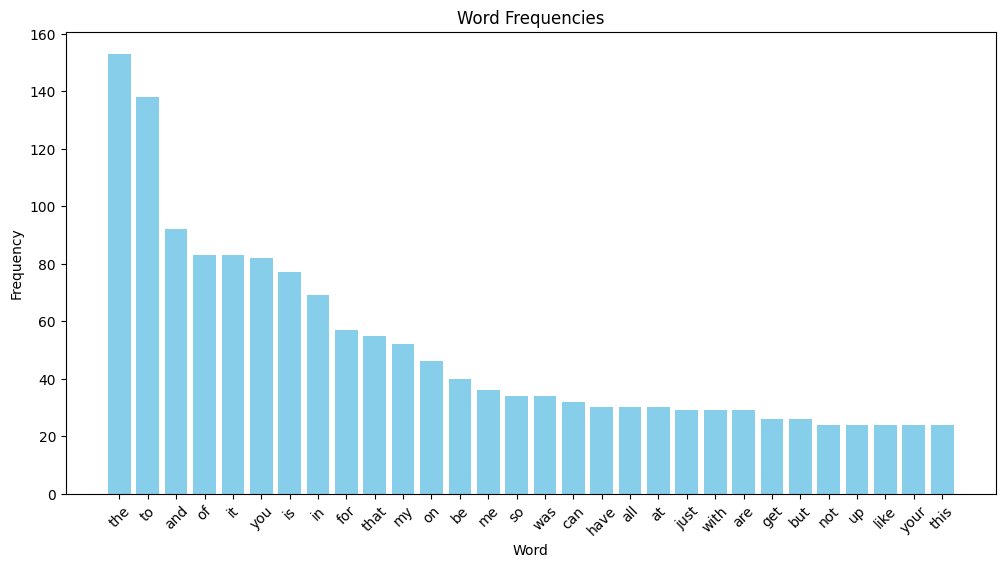

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
def plot30(df):
    #processing
    df = df['text']
    print(df)
    vectorizer = CountVectorizer()
    count_matrix = vectorizer.fit_transform(df)
    features = vectorizer.get_feature_names_out()
    word_freq = count_matrix.sum(axis=0).A1
    df = pd.DataFrame({"Word":features, "Frequency":word_freq}).sort_values(by="Frequency",ascending=False)
    
    #plotting
    plt.figure(figsize=(12, 6))
    plt.bar(df['Word'][:30], df['Frequency'][:30], color='skyblue')
    plt.xlabel('Word')
    plt.xticks(rotation=45)
    plt.ylabel('Frequency')
    plt.title('Word Frequencies')
    plt.show()

plot30(train_df)
plot30(test_df)

### Excercise 2

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

featurenum = 1000
tfid_vect = TfidfVectorizer(max_features=featurenum)
tfidf_train = tfid_vect.fit_transform(train_df["text"])
tfidf_train.toarray()
tfid_feature = [i for i in tfid_vect.get_feature_names_out()]
print("without tokenizer", tfid_feature[100:110])

featurenum = 1000
tfid_vect = TfidfVectorizer(max_features=featurenum, tokenizer=nltk.word_tokenize)
tfidf_train = tfid_vect.fit_transform(train_df["text"])
tfidf_train.toarray()
tfid_feature = [i for i in tfid_vect.get_feature_names_out()]
print("with tokenizer", tfid_feature[100:110])

without tokenizer ['bitter', 'black', 'blacks', 'blame', 'blessed', 'blood', 'bloody', 'blues', 'body', 'boiling']


c:\Users\Jansen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


with tokenizer ['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc', 'bday']


### Excercise 3
its a confusion matrix which consist of 4 value, True Positive, True Negative, False Positive, and False Negative

TP means that the prediction is correct that the instance is belong to that class

TN means that the prediction is correct that the instance is not belong to that class

FN means that the prediction is not correct that the instance suppose to be in that class

FP means that the preduction is not correct that the instance not suppose to be in that class

and this 4 falue can be use to compute the F1 score

### Excercise 4

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

    

c:\Users\Jansen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


training accuracy: 0.79
testing accuracy: 0.7
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347

[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


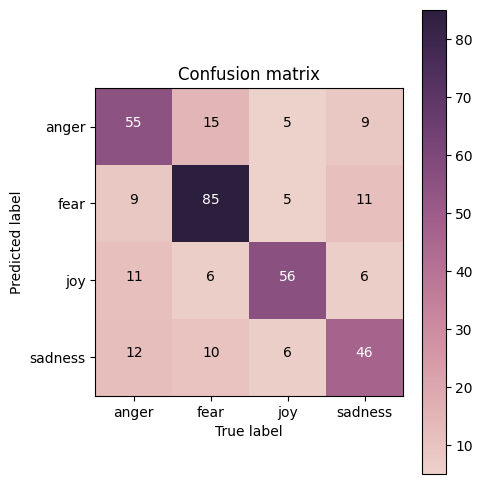

In [5]:
import nltk
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 
BOW_500.fit(train_df['text'])
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']
X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

MNB = MultinomialNB()
MNB = MNB.fit(X_train, y_train)

y_train_pred = MNB.predict(X_train)
y_test_pred = MNB.predict(X_test)

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

print(classification_report(y_true=y_test, y_pred=y_test_pred))
print(confusion_matrix(y_true=y_test, y_pred=y_test_pred) )
my_tags = ['anger', 'fear', 'joy', 'sadness']
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

### Exercise 5
The result of Naive Bayes is lower than Decision Tree, but the Naives Bayes predicted the test data set better than Decision Tree and we can see that from the Test F1 score.

the Decision tree use a tree structure to predict while the Naive Bayes use probability to compute the predicted

DT is easier to visualize due to the tree structure while NB i dont think we can visualize it because it compute the probability and its all number while in DT there are an actual graph

### Exercise 6

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


    epoch  accuracy      loss  val_accuracy  val_loss
0       0  0.386383  1.317042      0.472622  1.255564
1       1  0.655965  0.970940      0.642651  0.914497
2       2  0.804871  0.565762      0.694524  0.776414
3       3  0.852754  0.401348      0.697406  0.810720
4       4  0.881262  0.321117      0.697406  0.819871
5       5  0.913368  0.257858      0.697406  0.877809
6       6  0.932743  0.211810      0.700288  0.932554
7       7  0.945198  0.177813      0.682997  1.044695
8       8  0.951841  0.152615      0.680115  1.086266
9       9  0.959590  0.134989      0.688761  1.132382
10     10  0.960974  0.121333      0.697406  1.177705
11     11  0.967894  0.104362      0.665706  1.271226
12     12  0.968724  0.096889      0.662824  1.369640
13     13  0.972045  0.092213      0.671470  1.295275
14     14  0.968171  0.091116      0.665706  1.320962
15     15  0.971769  0.080974      0.674352  1.380402
16     16  0.972599  0.078367      0.671470  1.438158
17     17  0.975090  0.07349

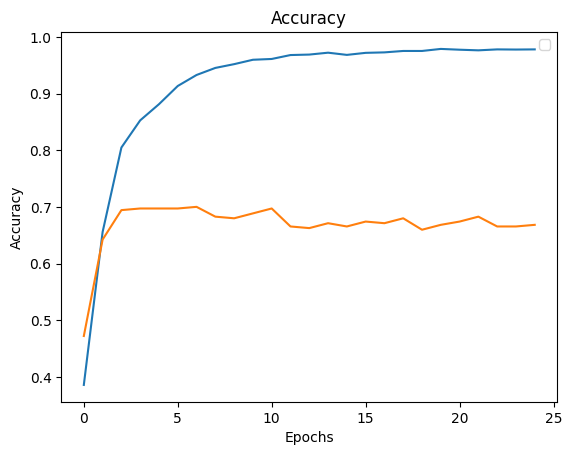

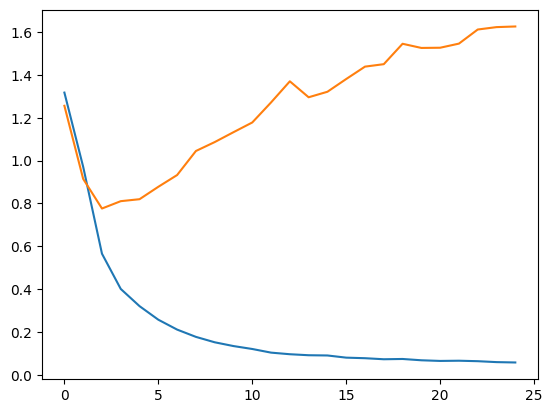

In [6]:
import matplotlib.pyplot as plt

training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
print(training_log)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy")

plt.plot(training_log["epoch"], training_log["accuracy"], label="Training Accuracy")
plt.plot(training_log["epoch"], training_log["val_accuracy"], label ="Validation Accuracy")
plt.show()

plt.plot(training_log["epoch"], training_log["loss"],label="Training Loss")
plt.plot(training_log["epoch"], training_log["val_loss"], label = "Validation Loss")
plt.show()

### Excercise 7
we can use TFIDF Weighted Factors where word importance affect the weight of the words or we can also use averaging or maybe used some pretrained model

### Excercise 8

In [7]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

load ok


In [8]:
# Answer here
word_list = ['angry','happy' , 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'e

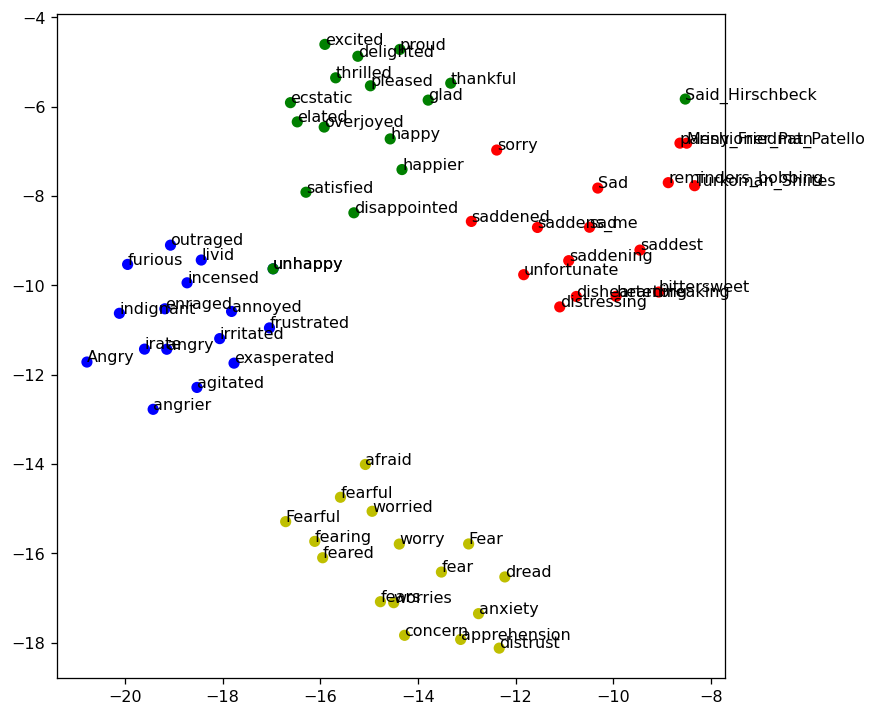

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

## Second and Third Part

### Merge and Preprocess the dataset

In [10]:
import pandas as pd
import json
from pandas import json_normalize


j_path  = 'tweets_DM.json'
di_path = 'data_identification.csv'
e_path  = 'emotion.csv'
temp = []
json_file = open(j_path, 'r')


#convert the json to df
for line in json_file:
    data = json.loads(line)
    temp.append(data)
df = pd.DataFrame(temp)

In [11]:
# flatten the json data
df_normalized = json_normalize(df["_source"])
df = pd.concat([df, df_normalized], axis=1)

# remove useless data
df = df.drop(columns=["_source"])
df = df.drop(columns=["_crawldate"])
df = df.drop(columns=["_type"])
df = df.drop(columns=["_index"])
df = df.rename(columns={'tweet.tweet_id' : 'tweet_id'})

In [12]:
# Read the CSV and merge
identification_df = pd.read_csv(di_path)
merged_df = pd.merge(df, identification_df, on='tweet_id', how='outer')

In [13]:
# Read the csv and merge
emotion_df = pd.read_csv(e_path)
merged_df = pd.merge(merged_df, emotion_df, on='tweet_id', how='outer')

In [14]:
# Separate into training and testing DataFrames
training_df = merged_df[merged_df['identification'] == 'train']
testing_df = merged_df[merged_df['identification'] == 'test']

In [15]:
#append hastags to text
training_df["tweet.text"] = training_df["tweet.hashtags"].astype(str) + " " + training_df["tweet.text"]
testing_df["tweet.text"] = testing_df["tweet.hashtags"].astype(str) + " " + testing_df["tweet.text"]

C:\Users\Jansen\AppData\Local\Temp\ipykernel_15040\1597186773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df["tweet.text"] = training_df["tweet.hashtags"].astype(str) + " " + training_df["tweet.text"]
C:\Users\Jansen\AppData\Local\Temp\ipykernel_15040\1597186773.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_df["tweet.text"] = testing_df["tweet.hashtags"].astype(str) + " " + testing_df["tweet.text"]


In [16]:
merged_df['emotion'].value_counts()

emotion
joy             516017
anticipation    248935
trust           205478
sadness         193437
disgust         139101
fear             63999
surprise         48729
anger            39867
Name: count, dtype: int64

In [17]:
training_df['emotion'].value_counts()

emotion
joy             516017
anticipation    248935
trust           205478
sadness         193437
disgust         139101
fear             63999
surprise         48729
anger            39867
Name: count, dtype: int64

In [18]:
testing_df

,_score,tweet.hashtags,tweet_id,tweet.text,identification,emotion
2,232,[bibleverse],0x28b412,"['bibleverse'] Confident of your obedience, I ...",test,NaN
4,989,[],0x2de201,"[] ""Trust is not the same as faith. A friend i...",test,NaN
9,66,"[materialism, money, possessions]",0x218443,"['materialism', 'money', 'possessions'] When d...",test,NaN
30,104,"[GodsPlan, GodsWork]",0x2939d5,"['GodsPlan', 'GodsWork'] God woke you up, now ...",test,NaN
33,310,[],0x26289a,"[] In these tough times, who do YOU turn to as...",test,NaN
...,...,...,...,...,...,...
1867525,602,[],0x2913b4,"[] ""For this is the message that ye heard from...",test,NaN
1867529,598,[],0x2a980e,"[] ""There is a lad here, which hath five barle...",test,NaN
1867530,827,"[mixedfeeling, butimTHATperson]",0x316b80,"['mixedfeeling', 'butimTHATperson'] When you b...",test,NaN
1867531,368,[],0x29d0cb,[] I swear all this hard work gone pay off one...,test,NaN


In [19]:
training_df

,_score,tweet.hashtags,tweet_id,tweet.text,identification,emotion
0,391,[Snapchat],0x376b20,"['Snapchat'] People who post ""add me on #Snapc...",train,anticipation
1,433,"[freepress, TrumpLegacy, CNN]",0x2d5350,"['freepress', 'TrumpLegacy', 'CNN'] @brianklaa...",train,sadness
3,376,[],0x1cd5b0,[] Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear
5,120,"[authentic, LaughOutLoud]",0x1d755c,"['authentic', 'LaughOutLoud'] @RISKshow @TheKe...",train,joy
6,1021,[],0x2c91a8,[] Still waiting on those supplies Liscus. <LH>,train,anticipation
...,...,...,...,...,...,...
1867526,94,"[NoWonder, Happy]",0x321566,"['NoWonder', 'Happy'] I'm SO HAPPY!!! #NoWonde...",train,joy
1867527,627,[],0x38959e,[] In every circumtance I'd like to be thankfu...,train,joy
1867528,274,[blessyou],0x2cbca6,['blessyou'] there's currently two girls walki...,train,joy
1867533,840,[],0x24faed,"[] Ah, corporate life, where you can date <LH>...",train,joy


### More Preprocessing (Text to vector & imbalance)

In [20]:
# #tfidf scrapped
# from sklearn.feature_extraction.text import TfidfVectorizer
# import nltk
# tfidf_vectorizer = TfidfVectorizer(tokenizer=nltk.word_tokenize)
# X_train_text = tfidf_vectorizer.fit_transform(training_df['tweet.text'])
# X_test_text = tfidf_vectorizer.fit_transform(testing_df['tweet.text'])

In [21]:
#word2vec
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from gensim.models import Word2Vec
import numpy as np
import pandas as pd
import nltk

def removesword(text):
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens]
    return ' '.join(tokens)

X_train = training_df['tweet.text'].apply(removesword)
X_test = testing_df['tweet.text'].apply(removesword)

sentences = [sentence.split() for sentence in X_train]
w2v_model = Word2Vec(sentences)

def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

X_train_text = np.array([vectorize(sentence) for sentence in X_train])
X_test_text = np.array([vectorize(sentence) for sentence in X_test])

In [22]:
import pandas as pd
y_train = training_df['emotion']
X_train = X_train_text
y_test  = testing_df['emotion']
X_test  = X_test_text

mappingfor = {'anger':0, 'anticipation':1, 'disgust':2, 'fear':3, 'joy':4, 'sadness':5, 'surprise':6, 'trust':7}
mappingback = { 0:'anger', 1:'anticipation', 2:'disgust', 3:'fear', 4:'joy', 5:'sadness', 6:'surprise', 7:'trust'}
y_train = y_train.map(mappingfor)
y_test  = y_test.map(mappingfor)

### Model Training and testing

#### XGB

In [23]:
import xgboost as xgb

xgbc = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=True)
xgbc.fit(X_train, y_train)
yPred = xgbc.predict(X_train)


#### RFC

In [24]:
# from sklearn.ensemble import RandomForestClassifier

# rfc = RandomForestClassifier(random_state=42)
# rfc.fit(X_train, y_train)
# yPred = rfc.predict(X_train)


#### F1 Score

In [25]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train, yPred)
print(f"Training Accuracy: {accuracy}")

Training Accuracy: 0.5326330773728104


### df to csv

In [26]:
yPred = xgbc.predict(X_test)
yPred = [mappingback[val] for val in yPred]
# yPred = pd.DataFrame(yPred)

temp = pd.DataFrame({'id': testing_df['tweet_id'], 'emotion': yPred})
temp.to_csv('predictions.csv', index=False)

In [27]:
temp

,id,emotion
2,0x28b412,anticipation
4,0x2de201,anticipation
9,0x218443,joy
30,0x2939d5,anticipation
33,0x26289a,anticipation
...,...,...
1867525,0x2913b4,anticipation
1867529,0x2a980e,anticipation
1867530,0x316b80,joy
1867531,0x29d0cb,joy
